In [ ]:
!pip install neurokit2
!pip install wfdb
!pip install py-ecg-detectors
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=6e5f77800a71d9befddf151c937302038d931118b0269e91c72c04eb016b2bf3
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
import neurokit2 as nk
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
from ecgdetectors import Detectors # desde https://pypi.org/project/py-ecg-detectors/
from hrv import HRV

Mounted at /content/drive


In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/CONTROLS') as f:
  lines = f.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/PTB/"
for line in lines:
  data_string = line.split("/")
  baseline_data = baseline + data_string[0] + "/" + data_string[1]
  try:
    time = 10 #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
    sample_from = time * 1000
    sample_to = 20*1000 # 5s de sampleo
    data[data_string[0]] = {}
    data[data_string[0]]["raw_data"] = record = wfdb.rdrecord(baseline_data.split("\n")[0], sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(data_string[0])
  try:
    data[data_string[0]]["ecg_signals"], data[data_string[0]]["info"] = nk.ecg_process(data[data_string[0]]["raw_data"].to_dataframe()["ii"], sampling_rate=1000)
    # nk.ecg_plot(data[data_string[0]]["ecg_signals"], sampling_rate=1000)
  except:
    pass
  
control_data = data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10

In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/arrythmias.txt') as t:
  arrythmias = t.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/"

i = 0
for line in arrythmias:
  data_string = line.split(",")
  baseline_data = baseline + data_string[0]

  if data_string[0] in data:
    sample = data_string[0] + str(i)
    i+=1
  else:
    sample = data_string[0]
  if data_string[0] == '\n':
    break
  try:
    minutes = int(data_string[2])
    time = (minutes*60) + int(data_string[3].split("/n")[0])
    sample_from = (time-5) * 360
    sample_to = (time+5)*360  # 10 s de sampling
    data[sample] = {}
  except:
    data.pop(sample)
  data[sample]["raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  try:
    data[sample]["ecg_signals"], data[sample]["info"] = nk.ecg_process(data[sample]["raw_data"].to_dataframe()["MLII"], sampling_rate=360)
  except:
    data[sample]["ecg_signals"], data[sample]["info"] = nk.ecg_process(data[sample]["raw_data"].to_dataframe()["V2"], sampling_rate=360)
  
arrythmia_data = data


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
arrythmia_data

{'100': {'raw_data': <wfdb.io.record.Record at 0x7f3f9b1f6a10>,
  'ecg_signals':       ECG_Raw  ECG_Clean   ECG_Rate   ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
  0      -0.405  -0.017915  74.482759  1.110223e-16            0            0   
  1      -0.400  -0.015931  74.482759  1.110223e-16            0            0   
  2      -0.395  -0.013845  74.482759  1.110223e-16            0            0   
  3      -0.375  -0.011963  74.482759  1.110223e-16            0            0   
  4      -0.390  -0.011613  74.482759  1.110223e-16            0            0   
  ...       ...        ...        ...           ...          ...          ...   
  3595   -0.340   0.024709  76.056338  0.000000e+00            0            0   
  3596   -0.325   0.024091  76.056338  0.000000e+00            0            0   
  3597   -0.310   0.022663  76.056338  0.000000e+00            0            0   
  3598   -0.325   0.019810  76.056338  0.000000e+00            0            0   
  3599   -0.345   0.016450  76

In [ ]:
control_data

{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7f3f9f566020>,
  'ecg_signals':       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
  0     -1.2880  -0.046118  62.878435          1.0            0            0   
  1     -1.2870  -0.045257  62.878435          1.0            0            0   
  2     -1.2785  -0.044381  62.878435          1.0            0            0   
  3     -1.2785  -0.043531  62.878435          1.0            0            0   
  4     -1.2805  -0.042720  62.878435          1.0            0            0   
  ...       ...        ...        ...          ...          ...          ...   
  9995  -2.7520  -0.012237  57.526366          0.0            0            0   
  9996  -2.7590  -0.011605  57.526366          0.0            0            0   
  9997  -2.7595  -0.010920  57.526366          0.0            0            0   
  9998  -2.7525  -0.010176  57.526366          0.0            0            0   
  9999  -2.7470  -0.009407  57.526

In [ ]:
# 'ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality', 'ECG_R_Peaks',
#        'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks',
#        'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks',
#        'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
#        'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
#        'ECG_Phase_Completion_Ventricular'
for item in control_data:
  print(control_data[item]["ecg_signals"]["ECG_Quality"].mean())


0.6029651720429026
0.5195442196128897
0.6297495788495096
0.36765822833346545
0.3922856693016145
0.6574897658433777
0.5732941140507657
0.646725042179209
0.4980969302988068
0.5412538230435505
0.5646044119459099
0.5886991988407678
0.7620968074550346
0.5441826314660876
0.6301035657056369
0.5406839804249802
0.6990769401055041
0.6042318954669653
0.42115619507901675
0.5193041880743151
0.5509247165526125
0.5350188683467332
0.4077245076147193
0.30097513827296535
0.7025992891607153
0.6208085161926153
0.5439243129692002
0.5038131884219944
0.7172740537015113
0.577380976137146
0.47469792749340806
0.6061515764096459
0.4857058630021807
0.6276556717130989
0.5267155398824823
0.6583120424641213
0.5751880917710033
0.39290515062652887
0.6777514174282461
0.44829414155353214
0.7100324037921678
0.4922329750274641
0.6491175562554343
0.49278594623404826
0.5491138541507528
0.6597092571739306
0.5320625455491226
0.6175628154558912
0.6485528300085963
0.6646099730309887


In [ ]:
ecg_signal_data = ['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks']

def dataAdquisition(data,fs):
  for item in data:
    peaks, info = nk.ecg_peaks(data[item]["ecg_signals"]["ECG_Clean"], sampling_rate=fs)
    # data[item]["r_peaks"] = data[item][e]
    data[item]["hrv_time"] = nk.hrv_time(peaks, sampling_rate=fs, show=False)
    for var in data[item]["hrv_time"]:
      data[item][var] = data[item]["hrv_time"][var].to_frame().iloc[0][var]
    for feature in ecg_signal_data:
      data[item][feature] = data[item]["ecg_signals"][feature].sum()
    data[item]["mean_quality"]  = data[item]["ecg_signals"]["ECG_Quality"].mean()

  return data

In [ ]:
arrythmia_data_clean = dataAdquisition(arrythmia_data, 360)
control_data_clean = dataAdquisition(control_data, 1000)

In [ ]:
for item in control_data_clean:
  dict_data = control_data_clean[item]["raw_data"].__dict__
  control_data_clean[item]["sex"] = dict_data['comments'][1].replace('sex: ', '')
  control_data_clean[item]["age"] = dict_data['comments'][0].replace('age: ', '')

In [ ]:
for item in arrythmia_data_clean:
  dict_data = arrythmia_data_clean[item]["raw_data"].__dict__
  arrythmia_data_clean[item]["sex"] = dict_data['comments'][0].split(' ')[1]
  arrythmia_data_clean[item]["age"] = dict_data['comments'][0].split(' ')[0]

<ipython-input-12-1f688da07479>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data_df_AR.corr()


<Axes: >

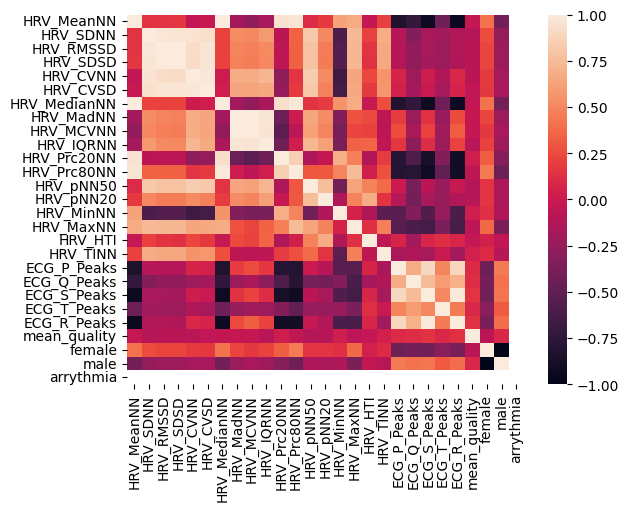

In [ ]:
final_data_df_AR = pd.DataFrame.from_dict(arrythmia_data_clean, orient = 'index')

final_data_df_AR = final_data_df_AR.join(pd.get_dummies(final_data_df_AR["sex"])).drop("sex", axis = 1)
final_data_df_AR["arrythmia"] = [1]*len(final_data_df_AR.index)
# final_data_df_AR.dropna(inplace= True)

final_data_df_AR.rename(columns = {'F':'female', 'M': 'male'}, inplace = True)
# 'HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', '	HRV_SDNNI5'
final_data_df_AR.drop(columns = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2','HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5'], inplace = True)
final_data_df_AR
corr = final_data_df_AR.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

<ipython-input-13-c38274e25233>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = control_data_df.corr()


<Axes: >

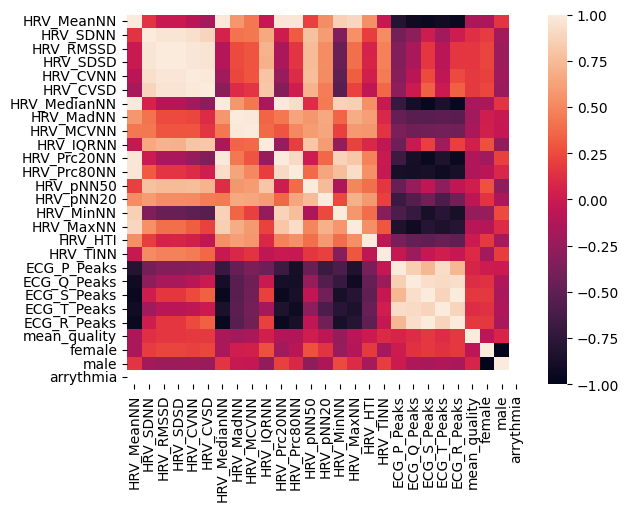

In [ ]:
control_data_df = pd.DataFrame.from_dict(control_data_clean, orient = 'index')
control_data_df = control_data_df.join(pd.get_dummies(control_data_df["sex"])).drop("sex", axis = 1)
control_data_df["arrythmia"] = [0]*len(control_data_df.index)
control_data_df.drop(columns = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2','HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5'], inplace = True)
corr = control_data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

<ipython-input-14-c8b69bf26c99>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_FINAL_df.corr()


<Axes: >

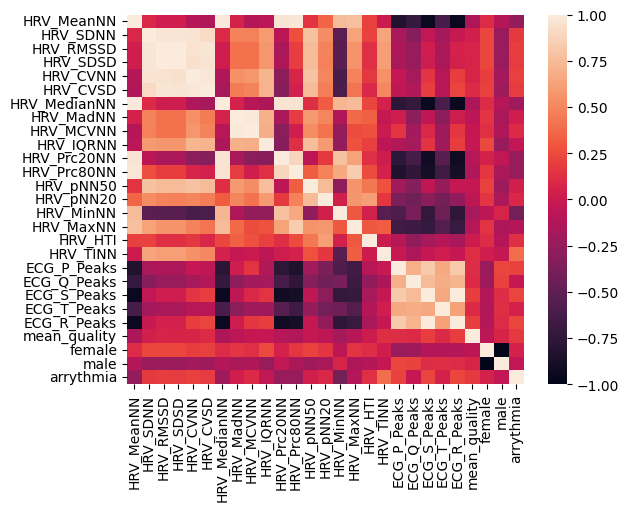

In [ ]:
final_FINAL_df = pd.concat([final_data_df_AR,control_data_df], axis = 0)
final_FINAL_df.dropna(inplace=True)
corr = final_FINAL_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
final_FINAL_df

,raw_data,ecg_signals,info,hrv_time,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,...,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,ECG_R_Peaks,mean_quality,age,female,male,arrythmia
100,<wfdb.io.record.Record object at 0x7f3f9b1f6a10>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': [236, 527, 809, 1103, 1405, 17...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,805.555556,29.212926,28.067929,29.515114,0.036264,0.034843,...,12,11,11,12,12,0.617106,69,0,1,1
1000,<wfdb.io.record.Record object at 0x7f3f9b23b220>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [383, 691, 990, 1280, 1561, 18...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,806.060606,89.043426,142.101728,149.127550,0.110467,0.176292,...,12,11,11,11,12,0.673991,69,0,1,1
101,<wfdb.io.record.Record object at 0x7f3f9b257670>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [311, 686, 1054, 1422, 1773, 2...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,992.592593,50.288519,67.471988,70.425608,0.050664,0.067976,...,10,9,9,9,10,0.643327,75,1,0,1
1011,<wfdb.io.record.Record object at 0x7f3f9f52d3c0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [385, 753, 1103, 1457, 1822, 2...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,1015.277778,27.297434,28.560404,30.801082,0.026887,0.028131,...,9,8,8,9,9,0.413333,75,1,0,1
102,<wfdb.io.record.Record object at 0x7f3f9b1f43a0>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': [272, 549, 825, 1108, 1398, 16...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,791.414141,27.818152,24.767437,25.973831,0.035150,0.031295,...,5,9,11,8,12,0.668521,84,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient267,<wfdb.io.record.Record object at 0x7f3f9b222e90>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': [690, 1015, 1403, 1792, 2355, ...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,534.941176,230.829339,448.150714,462.848063,0.431504,0.837757,...,8,14,18,12,19,0.659709,67,1,0,0
patient276,<wfdb.io.record.Record object at 0x7f3f9b223af0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [433, 1241, 2058, 2878, 3668, ...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,786.083333,23.302198,16.887327,17.637254,0.029643,0.021483,...,13,12,12,12,13,0.532063,n/a,0,1,0
patient277,<wfdb.io.record.Record object at 0x7f3f9b2234f0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [1134, 2309, 3511, 4713, 5860,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,1215.714286,53.368887,72.005787,78.486729,0.043899,0.059229,...,8,7,7,8,8,0.617563,n/a,0,1,0
patient279,<wfdb.io.record.Record object at 0x7f3fd353ff70>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': [891, 2214, 3570, 4935, 6220, ...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SD...,1269.857143,179.590672,211.833268,216.742858,0.141426,0.166817,...,8,7,7,8,8,0.648553,35,1,0,0


In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/Shareddrives/Proyecto Final/Progra/neuropy_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

final_FINAL_df.to_csv(filepath)
# final_data_df.to_excel(filepath)